In [1]:
import pandas as pd

stats = pd.read_pickle("../Data Mining/data/statistics.pkl")
jobs_df = pd.read_pickle("../Data Mining/data/jobs.pkl")
display(stats.tail())
display(jobs_df)

,Date,junior+data+scientist,junior+data+science,junior+data+analyst,junior+data+analysis
26,30.09.2023,0,0,0,0
27,30.09.2023,0,0,0,0
28,01.10.2023,0,0,0,1
29,01.10.2023,0,0,0,0
30,02.10.2023,0,0,0,0


,Titel,Unternehmen,Ort,Gehalt_min,Gehalt_max,JobID,Link,Datum,Teilzeit_Remote,Introduction,Description,Profile,We_offer,Contact
0,(Junior) Data Scientist (m/w/d),KMH GmbH,Köln,4032,5726,57650956,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Teilzeit, Home Office möglich",Wir suchen in Voll- oder Teilzeit\nWir suchen ...,Entwicklung und Implementierung von Algorith­m...,Berufserfahrung im oben genannten Aufgaben­ber...,Freie Hardwarewahl nach deinen Wünschen inkl. ...,Wir freuen uns über deine Bewerbung!\n\n KMH G...
1,Junior Data Scientist (m/w/d),TUI Cruises GmbH,Hamburg,3548,5081,57605321,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",TUI Cruises ist einer der führenden Kreuzfahrt...,"Du analysierst große, komplexe Datensätze mit ...",Bachelor Abschluss in (Wirtschafts-)Informatik...,Eine flexible Arbeitszeitkultur mit zwei Mobil...,TUI Cruises GmbH \nHeidenkampsweg 58\n20097 Ha...
2,Junior Data Scientist (m/f/x),TUI Cruises GmbH,Hamburg,3548,5081,57605323,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",TUI Cruises is one of the leading cruise provi...,"Analyze large, complex datasets to extract ins...","Bachelor’s degree in Computer Science, Data Sc...",A flexible working time culture with two mobil...,TUI Cruises GmbH \nHeidenkampsweg 58\n20097 Ha...
3,(Junior) Data Scientist / Data Analyst (w/m/d),1&1,"Karlsruhe, Montabaur, Maintal",3871,6129,57608864,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",Mit rund 15 Mio. Kundenverträgen und 3.200 Mit...,"Für unsere Abteilung ""Customer Decisioning"" su...",Gute Deutschkenntnisse in Wort und Schrift\nEr...,Attraktives Gehalt\nVertrauensarbeitszeit mit ...,
4,Junior Data Scientist (m/w/d) – Risikomodelle,Sparkassen Rating und Risikosysteme GmbH,Berlin,3710,5161,57181289,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",Die Sparkassen Rating und Risikosysteme (SR) i...,Mitarbeit an Gremien- oder Kundenprojekten im ...,Abgeschlossenes Studium (ggf. Promotion) im Be...,Eine unbefristete Tätigkeit in einem hoch vers...,Herr Emanuel Reitzenstein Tel. +49 30 20672-0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,Business Analyst (m/w/d) Prozess- & Systemopti...,Continentale Lebensversicherung AG,München,5645,6048,57550334,https://www.stepstone.de/stellenangebote--busi...,2023-09-30,"Vollzeit, Home Office möglich",München\nunbefristet\nVollzeit\n,Sie möchten eine verantwortungsvolle Aufgabe u...,Ausbildung: Sie haben ein abgeschlossenes Stud...,Vermögenswirksame Leistungen & Sonderzahlungen...,
8159,Senior Agile Business Analyst:in / Requirement...,HDI AG,"Hannover, Köln",5161,7419,57601937,https://www.stepstone.de/stellenangebote--seni...,2023-09-30,"Vollzeit, Teilzeit, Home Office möglich",\nStarten Sie durch bei der HDI AG! Innerhalb ...,Mitarbeit in einem agilen Entwicklungsteam (SA...,"Erfolgreich abgeschlossenes Studium, vorzugswe...",Aktienprogramm Wir bieten Ihnen jedes Jahr die...,
8160,Business Analyst (m/w/d) im Squad „Optimierung...,SIGNAL IDUNA Gruppe,"Dortmund, Hamburg, Koblenz, Leipzig",3710,5484,57530536,https://www.stepstone.de/stellenangebote--busi...,2023-09-30,"Vollzeit, Home Office möglich",SIGNAL IDUNA ist einer der Top-Service-Versich...,Du arbeitest in den „Delivery Units“ und bist ...,Als Business Analyst (m/w/d) bist Du Teil eine...,Moderne Arbeitsumgebung sowie die Möglichkeit ...,
8161,Senior Security Operations Center Analyst (m/w/d),BWI GmbH,"Bonn, Koblenz, Köln",4677,6694,57737013,https://www.stepstone.de/stellenangebote--seni...,2023-09-30,"Vollzeit, Home Office möglich",Als IT-Systemhaus der Bundeswehr und IT-Dienst...,Bearbeitung von Sicherheitsvorkommnissen und K...,Erfolgreich abgeschlossenes Studium mit Schwer...,Langfristig sicherer Arbeitsplatz\nSpannende u...,


In [73]:
jobs_err = jobs_df[(jobs_df["Teilzeit_Remote"] == "-") & (jobs_df["Introduction"] == "")]
jobs_err

,Titel,Unternehmen,Ort,Gehalt_min,Gehalt_max,JobID,Link,Datum,Teilzeit_Remote,Introduction,Description,Profile,We_offer,Contact


In [74]:
stats["junior+data+scientist"] = stats["junior+data+scientist"].astype("Int64")
stats["junior+data+science"] = stats["junior+data+science"].astype("Int64")
stats["junior+data+analyst"] = stats["junior+data+analyst"].astype("Int64")
stats["junior+data+analysis"] = stats["junior+data+analysis"].astype("Int64")
stats["Date"] = pd.to_datetime(stats["Date"], format="%d.%m.%Y")
display(stats.dtypes)

Date                     datetime64[ns]
junior+data+scientist             Int64
junior+data+science               Int64
junior+data+analyst               Int64
junior+data+analysis              Int64
dtype: object

In [75]:
stats = stats.groupby("Date").sum().reset_index()
stats["Summe"] = stats[["junior+data+scientist", "junior+data+science", "junior+data+analyst", "junior+data+analysis"]].sum(axis=1)
stats.head()

,Date,junior+data+scientist,junior+data+science,junior+data+analyst,junior+data+analysis,Summe
0,2023-09-04,0,0,0,0,0
1,2023-09-05,3,0,0,0,3
2,2023-09-06,0,0,0,0,0
3,2023-09-07,0,1,16,18,35
4,2023-09-08,8,4,2,1,15


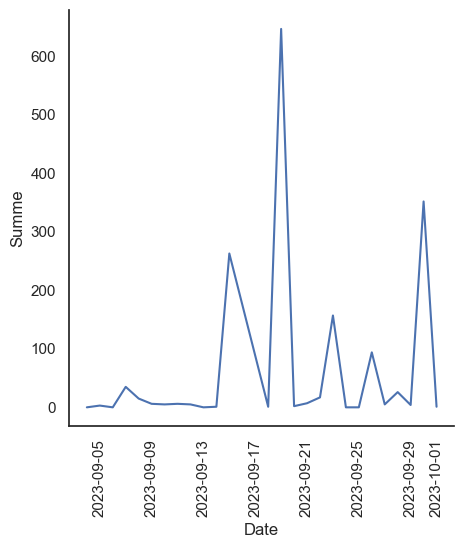

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style("white")
g = sns.relplot(data=stats, x="Date", y="Summe", kind="line")
plt.xticks(rotation=90)
plt.show()

In [77]:
jobs_df["Gehalt_min"] = pd.to_numeric(jobs_df["Gehalt_min"], errors="coerce").astype("Int64")
jobs_df["Gehalt_max"] = pd.to_numeric(jobs_df["Gehalt_max"], errors="coerce").astype("Int64")

display(jobs_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8163 entries, 0 to 8162
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Titel            8163 non-null   object        
 1   Unternehmen      8163 non-null   object        
 2   Ort              8163 non-null   object        
 3   Gehalt_min       5426 non-null   Int64         
 4   Gehalt_max       5426 non-null   Int64         
 5   JobID            8163 non-null   object        
 6   Link             8163 non-null   object        
 7   Datum            8163 non-null   datetime64[ns]
 8   Teilzeit_Remote  8163 non-null   object        
 9   Introduction     8163 non-null   object        
 10  Description      8163 non-null   object        
 11  Profile          8163 non-null   object        
 12  We_offer         8163 non-null   object        
 13  Contact          8163 non-null   object        
dtypes: Int64(2), datetime64[ns](1), object(11)
me

None

In [78]:
# Säubere Link Format, um Duplikate besser erkennen zu können
jobs_df["Link"] = jobs_df["Link"].str.rsplit("?&cid", n=1, expand=True)[0]

# Entferne Duplikate
jobs_no_dups = jobs_df.drop_duplicates(subset=["Link"])

In [79]:
# Filter nach Jobs, die bestimmte Schlagwörter im Titel oder Beschreibungstext haben
keywords = ["data", "analy", "daten"]

def check_keyword(string):
	for word in keywords:
		if word in string.lower():
			return True
	return False

jobs_relevant = jobs_no_dups[jobs_no_dups["Titel"].apply(check_keyword)]

In [80]:
# Zeitumfang und Remote Spalten erstellen
print(jobs_relevant["Teilzeit_Remote"].unique())
verfügbar = jobs_relevant[~jobs_relevant["Teilzeit_Remote"].isin(["Stellenanzeige nicht mehr verfügbar", "-", "Nicht stepstone"])]
jobs_relevant.loc[:,"Vollzeit"] = verfügbar["Teilzeit_Remote"].apply(lambda x: "Vollzeit" in x)
jobs_relevant.loc[:,"Teilzeit"] = verfügbar["Teilzeit_Remote"].apply(lambda x: "Teilzeit" in x)
jobs_relevant.loc[:,"Zeit flexibel"] = jobs_relevant["Vollzeit"] & jobs_relevant["Teilzeit"]
jobs_relevant.loc[:,"Remote"] = verfügbar["Teilzeit_Remote"].apply(lambda x: "Home Office möglich" in x)

jobs_relevant[["Vollzeit", "Teilzeit", "Zeit flexibel", "Remote"]].info()

['Vollzeit, Teilzeit, Home Office möglich' 'Vollzeit, Home Office möglich'
 'Vollzeit' 'Stellenanzeige nicht mehr verfügbar' 'Teilzeit'
 'Teilzeit, Home Office möglich' 'Vollzeit, Teilzeit' '-'
 'Nicht stepstone' 'Home Office möglich']
<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 8162
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Vollzeit       1930 non-null   object
 1   Teilzeit       1930 non-null   object
 2   Zeit flexibel  2004 non-null   bool  
 3   Remote         1930 non-null   object
dtypes: bool(1), object(3)
memory usage: 64.6+ KB


/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_39721/1833847377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_relevant.loc[:,"Vollzeit"] = verfügbar["Teilzeit_Remote"].apply(lambda x: "Vollzeit" in x)
/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_39721/1833847377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_relevant.loc[:,"Teilzeit"] = verfügbar["Teilzeit_Remote"].apply(lambda x: "Teilzeit" in x)
/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_39721

In [81]:
# Erstelle Job Kategorien
data_science_roles = {"Management/Teamlead":["manag", "teamlead", "team lead", "head of", "teamleit"],
					"Praktikum/Student/Trainee": ["praktik", "student", "trainee", "studium"],
					"Product Owner": ["product owner"],
					"Consultant": ["consult"],
					"Data Scientist": ["scien", "wissenschaft"], 
					"Data Engineer": ["engineer"],
					"Data Analyst": ["analy"],  
					"Data Architekt": ["archite"],
					"Data Warehouse": ["warehouse"],
					"Systemadministrator": ["systemadmin", "system admin"],
					"Datenbank": ["datenbank", "database"],
					"Data Protection": ["protection", "privacy", "datenschutz", "security"]}

def role(title):
	for role, keywords in data_science_roles.items():
		for word in keywords:
			if word in title.lower():
				return role
	return "Andere"
			
jobs_relevant.loc[:, "Job Kategorie"] = jobs_relevant["Titel"].apply(role)
non_classified_jobs = jobs_relevant[jobs_relevant["Job Kategorie"] == "Andere"]

jobs_relevant["Job Kategorie"].value_counts()

/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_39721/48247768.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_relevant.loc[:, "Job Kategorie"] = jobs_relevant["Titel"].apply(role)


Job Kategorie
Data Analyst                 788
Management/Teamlead          394
Data Engineer                187
Praktikum/Student/Trainee    160
Data Scientist               156
Andere                       114
Consultant                    89
Data Architekt                35
Data Protection               25
Product Owner                 21
Datenbank                     16
Data Warehouse                14
Systemadministrator            5
Name: count, dtype: int64

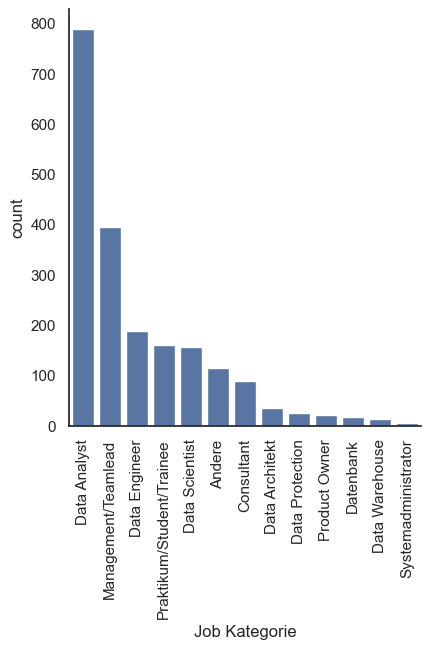

In [82]:
import seaborn as sns

# Job Kategorien
g = sns.catplot(data=jobs_relevant, x="Job Kategorie", kind="count", order = jobs_relevant["Job Kategorie"].value_counts().index)
plt.xticks(rotation=90)

h = sns.catplot
plt.show()

In [83]:
jobs_scientist_analyst = jobs_relevant[jobs_relevant["Job Kategorie"].isin(["Data Analyst", "Data Scientist"])]
jobs_scientist_analyst

,Titel,Unternehmen,Ort,Gehalt_min,Gehalt_max,JobID,Link,Datum,Teilzeit_Remote,Introduction,Description,Profile,We_offer,Contact,Vollzeit,Teilzeit,Zeit flexibel,Remote,Job Kategorie
0,(Junior) Data Scientist (m/w/d),KMH GmbH,Köln,4032,5726,57650956,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Teilzeit, Home Office möglich",Wir suchen in Voll- oder Teilzeit\nWir suchen ...,Entwicklung und Implementierung von Algorith­m...,Berufserfahrung im oben genannten Aufgaben­ber...,Freie Hardwarewahl nach deinen Wünschen inkl. ...,Wir freuen uns über deine Bewerbung!\n\n KMH G...,True,True,True,True,Data Scientist
1,Junior Data Scientist (m/w/d),TUI Cruises GmbH,Hamburg,3548,5081,57605321,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",TUI Cruises ist einer der führenden Kreuzfahrt...,"Du analysierst große, komplexe Datensätze mit ...",Bachelor Abschluss in (Wirtschafts-)Informatik...,Eine flexible Arbeitszeitkultur mit zwei Mobil...,TUI Cruises GmbH \nHeidenkampsweg 58\n20097 Ha...,True,False,False,True,Data Scientist
2,Junior Data Scientist (m/f/x),TUI Cruises GmbH,Hamburg,3548,5081,57605323,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",TUI Cruises is one of the leading cruise provi...,"Analyze large, complex datasets to extract ins...","Bachelor’s degree in Computer Science, Data Sc...",A flexible working time culture with two mobil...,TUI Cruises GmbH \nHeidenkampsweg 58\n20097 Ha...,True,False,False,True,Data Scientist
3,(Junior) Data Scientist / Data Analyst (w/m/d),1&1,"Karlsruhe, Montabaur, Maintal",3871,6129,57608864,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",Mit rund 15 Mio. Kundenverträgen und 3.200 Mit...,"Für unsere Abteilung ""Customer Decisioning"" su...",Gute Deutschkenntnisse in Wort und Schrift\nEr...,Attraktives Gehalt\nVertrauensarbeitszeit mit ...,,True,False,False,True,Data Scientist
4,Junior Data Scientist (m/w/d) – Risikomodelle,Sparkassen Rating und Risikosysteme GmbH,Berlin,3710,5161,57181289,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,"Vollzeit, Home Office möglich",Die Sparkassen Rating und Risikosysteme (SR) i...,Mitarbeit an Gremien- oder Kundenprojekten im ...,Abgeschlossenes Studium (ggf. Promotion) im Be...,Eine unbefristete Tätigkeit in einem hoch vers...,Herr Emanuel Reitzenstein Tel. +49 30 20672-0 ...,True,False,False,True,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,SAP Business Analyst (m/w/d) ERP Planning,Trelleborg Sealing Solutions Germany GmbH,Stuttgart,4677,6371,57727018,https://www.stepstone.de/stellenangebote--sap-...,2023-09-30,Vollzeit,SAP Business Analyst (m/w/d) ERP Planning\nTre...,Der SAP Business Analyst (m/f/d) analysiert di...,Umfangreiche Erfahrung in der Nutzung von SCM-...,Abwechslungsreiche und verantwortungsvolle Auf...,,True,False,False,False,Data Analyst
8158,Business Analyst (m/w/d) Prozess- & Systemopti...,Continentale Lebensversicherung AG,München,5645,6048,57550334,https://www.stepstone.de/stellenangebote--busi...,2023-09-30,"Vollzeit, Home Office möglich",München\nunbefristet\nVollzeit\n,Sie möchten eine verantwortungsvolle Aufgabe u...,Ausbildung: Sie haben ein abgeschlossenes Stud...,Vermögenswirksame Leistungen & Sonderzahlungen...,,True,False,False,True,Data Analyst
8160,Business Analyst (m/w/d) im Squad „Optimierung...,SIGNAL IDUNA Gruppe,"Dortmund, Hamburg, Koblenz, Leipzig",3710,5484,57530536,https://www.stepstone.de/stellenangebote--busi...,2023-09-30,"Vollzeit, Home Office möglich",SIGNAL IDUNA ist einer der Top-Service-Versich...,Du arbeitest in den „Delivery Units“ und bist ...,Als Business Analyst (m/w/d) bist Du Teil eine...,Moderne Arbeitsumgebung sowie die Möglichkeit ...,,True,False,False,True,Data Analyst
8161,Senior Security Operations Center Analyst (m/w/d),BWI GmbH,"Bonn, Koblenz, Köln",4677,6694,57737013,https://www.

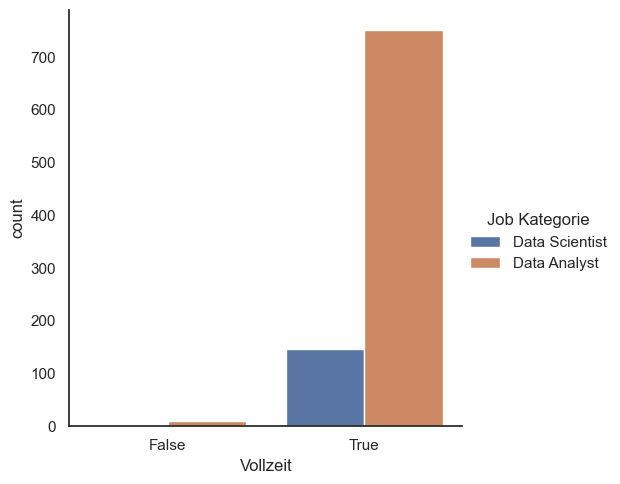

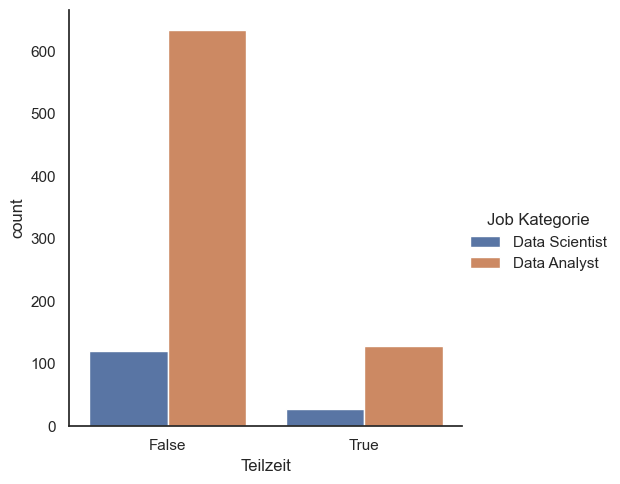

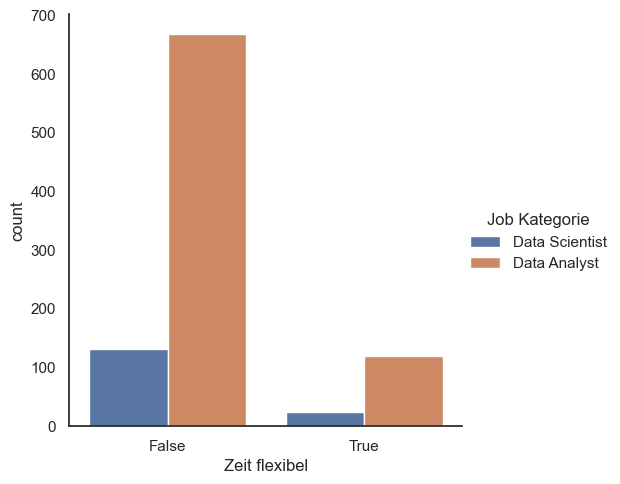

In [84]:
# Teilzeit, Vollzeit, Flexibel
g = sns.catplot(data=jobs_scientist_analyst, x="Vollzeit", kind="count", hue="Job Kategorie")
h = sns.catplot(data=jobs_scientist_analyst, x="Teilzeit", kind="count", hue="Job Kategorie")
i = sns.catplot(data=jobs_scientist_analyst, x="Zeit flexibel", kind="count", hue="Job Kategorie")

plt.show()

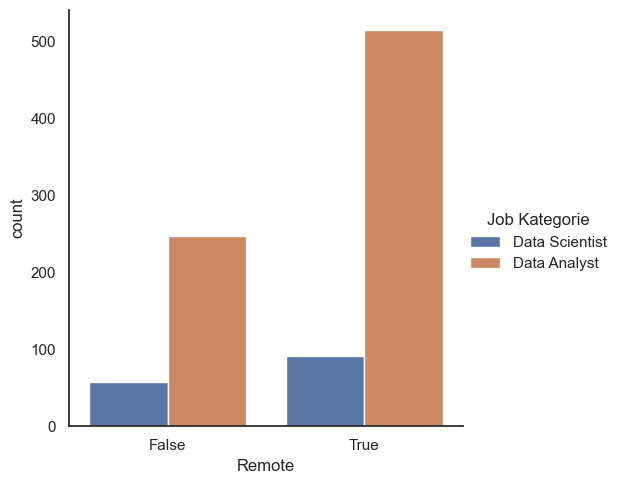

In [85]:
# Remote
g = sns.catplot(data=jobs_scientist_analyst, x="Remote", kind="count", hue="Job Kategorie")
plt.show()

In [86]:
jobs_scientist_analyst.loc[:, "Gehalt_min"] = jobs_scientist_analyst["Gehalt_min"]*12
jobs_scientist_analyst.loc[:, "Gehalt_max"] = jobs_scientist_analyst["Gehalt_max"]*12

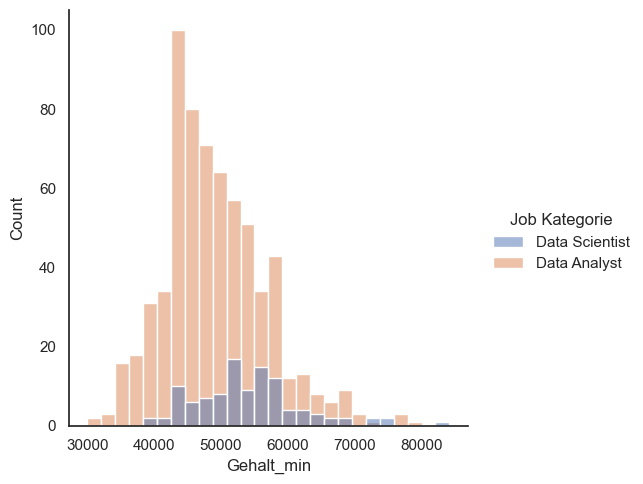

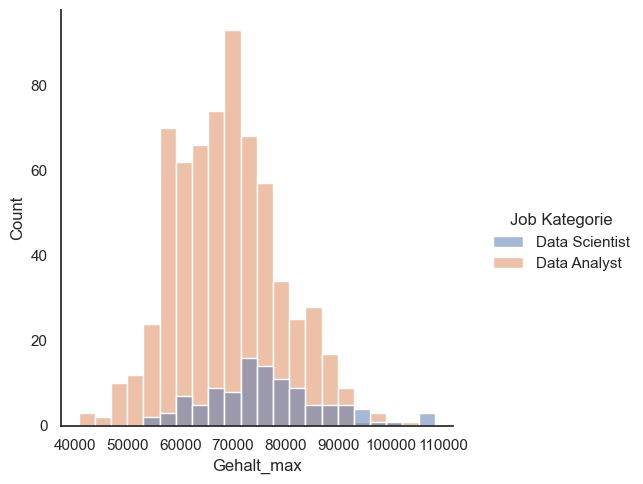

In [127]:
g = sns.displot(data=jobs_scientist_analyst, x="Gehalt_min", hue="Job Kategorie", kind="hist")
g = sns.displot(data=jobs_scientist_analyst, x="Gehalt_max", hue="Job Kategorie", kind="hist")
plt.show()

In [91]:
# jobs_scientist_analyst[(jobs_scientist_analyst["Gehalt_min"] < 35000) | (jobs_scientist_analyst["Gehalt_min"] > 75000)] 

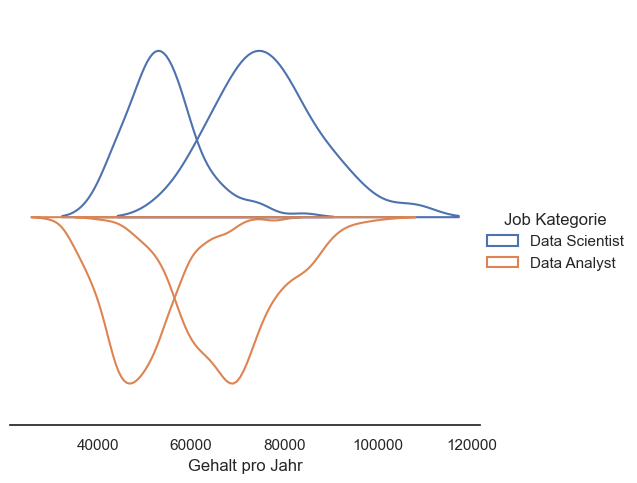

In [125]:
g = sns.catplot(data=jobs_scientist_analyst, hue="Job Kategorie", x="Gehalt_min", kind="violin", split =True, inner=None, fill=None)
sns.violinplot(data=jobs_scientist_analyst, hue="Job Kategorie", x="Gehalt_max", split =True, inner=None, fill=None, legend=False)
plt.xlabel("Gehalt pro Jahr")
g.despine(left=True)
plt.show()

In [90]:
# jobs_scientist_analyst[(jobs_scientist_analyst["Gehalt_max"] < 50000) | (jobs_scientist_analyst["Gehalt_max"] > 100000)] 

In [ ]:
# Clean Titles
regex = [r":\((?:.*[/,\-|_]){2}.+\)"g,# m/w/x etc
		r":\([aA]ll.? [Gg].+\)"g, # alle geschlechter/gender
		r":\([mM]ensch.?\)"g, #menschx
		r":[mwfd][/,\-|_][mwfd][/,\-|_][mwfd]"g, # m,w,d etc
		r":\([mwfd]+\)"g, # mwdf
		r":\(all\)"g,
		r":\(\*?[gn]*\*?\)"g # gn*
		] 

for gender in regex:
	jobs_relevant.loc[:, "Titel"] = jobs_relevant["Titel"].str.replace(gender, "", regex=True)

jobs_relevant.loc[:, "Titel"] = jobs_relevant["Titel"].str.strip()
jobs_relevant.groupby("Titel", ).size().sort_values(ascending=False)

In [3]:
staedte_list = list(jobs_relevant["Ort"].values)

seperators = [",", "oder"]
staedte_list_corr = []
for seperator in seperators:
	for staedte in staedte_list:
		for i in staedte.split(seperator):
			staedte_list_corr.append(i.strip())
	staedte_list = staedte_list_corr
	staedte_list_corr = []

# Duplikate und Fehler korrigieren
# remote = ["bundesweit", "Home Office", "Alle Standorte", "DE", "Bundesweit", "GERMANY"]
# berlin = ["Berlin", "BERLIN"]
# empty = "" # leerer String
# 		# zahlen


staedte_list

['Köln',
 'Hamburg',
 'Hamburg',
 'Karlsruhe',
 'Montabaur',
 'Maintal',
 'Berlin',
 'Unterföhring (bei München)',
 'Ober-Ramstadt bei Darmstadt',
 'Köln',
 'Hamburg',
 'München',
 'Dortmund',
 'Heidelberg',
 'Dresden',
 'Hamburg',
 'Berlin',
 'Bielefeld',
 'Coburg',
 'Schweinfurt',
 'Karlsruhe',
 'Freiburg im Breisgau',
 'Mannheim',
 'Pforzheim',
 'Stuttgart',
 'Heilbronn',
 'Darmstadt',
 'Rheine',
 'Darmstadt bei Frankfurt am Main',
 'Weeze',
 'Berlin',
 'Weinheim',
 'Düsseldorf',
 'Hamburg - tesa Werk Hamburg',
 'bundesweit',
 'Berlin',
 'Frankfurt am Main',
 'Hamburg',
 'Köln',
 'Leipzig',
 'München',
 'Frankfurt am Main',
 'Hamburg',
 'Leipzig',
 'München',
 'Stuttgart',
 'Walldorf',
 'Berlin',
 'Düsseldorf',
 'Berlin',
 'Germany',
 'Würzburg',
 'Oberkochen (Baden-Württemberg)',
 'Fellbach bei Stuttgart',
 'Oberursel',
 'Essen',
 'Heilbronn',
 'Oberkochen (Baden-Württemberg)',
 'Stuttgart',
 'Berlin',
 'Hamburg',
 'München',
 'Frankfurt am Main',
 'Düsseldorf',
 'Stuttgart',
 'Kar

In [4]:
staedte_series = pd.Series(staedte_list)
staedte_df = pd.DataFrame(staedte_series)
staedte_df.rename(columns={0:"Stadt"}, inplace=True)
staedte_df= pd.DataFrame(staedte_df.value_counts())
staedte_df = staedte_df.reset_index()
staedte_df

,Stadt,count
0,München,1312
1,Hamburg,1079
2,Berlin,1048
3,Köln,713
4,Stuttgart,606
...,...,...
1205,Lemgo,1
1206,Lengede,1
1207,Leonberg (Stuttgart),1
1208,Leutkirch im Allgäu,1


In [5]:
staedte_df.sort_values("Stadt").head(50)

,Stadt,count
23,,78
1137,...und weitere,1
609,01-09,1
239,10557,4
580,10787,1
585,20-29,1
638,30-39,1
643,40-48,1
647,40221,1
613,40227 Düsseldorf,1


In [76]:
display(jobs_df[jobs_df["Ort"] == "Braunschweig"].groupby("Unternehmen").size().sort_values(ascending=False))
display(jobs_df.query("Unternehmen == 'NEW YORKER'"))

Unternehmen
NEW YORKER                                      12
AUEL EDV-Beratung GmbH                           6
Volkswagen Financial Services AG                 4
ZEISS                                            4
August Reiners Bauunternehmung GmbH              1
BMA Braunschweigische Maschinenbauanstalt AG     1
FERCHAU GmbH                                     1
IU Internationale Hochschule                     1
KOSATEC Computer GmbH                            1
Oeding Unternehmensgruppe                        1
dtype: int64

,Titel,Unternehmen,Ort,Gehalt_min,Gehalt_max,JobID,Link,Datum,Teilzeit_Remote,Introduction,Description,Profile,We_offer,Contact
309,(Senior) Data Science Consultant*,NEW YORKER,"Berlin (Schöneberg), Braunschweig",,,57336569,https://www.stepstone.de/stellenangebote--seni...,2023-09-04,Vollzeit,Als inhabergeführtes Modeunternehmen mit weltw...,Erarbeiten und Umsetzen betriebswirtschaftlich...,"Studium der Wirtschaftswissenschaften, Ökonome...","Ein sicherer, unbefristeter Arbeitsplatz in ei...",Bewirb Dich bitte über unser Online-Bewerbungs...
442,IT System Engineer* Data Center,NEW YORKER,"Berlin (Schöneberg), Braunschweig",,,57289288,https://www.stepstone.de/stellenangebote--proj...,2023-09-04,Vollzeit,"Mit unseren Marken BMW, MINI, Rolls-Royce und ...",DAS PRODUKT IST DAS HERZ. DIE IT DAS NERVENSYS...,Was bringst du mit?\nStudienabschluss in Infor...,Was bieten wir dir?\n30 Urlaubstage.\nAttrakti...,Stellenreferenz: 102344 \n \nAnsprechpartner:...
1260,(Junior) Controller* Schwerpunkt Warencontrolling,NEW YORKER,Braunschweig,,,57581363,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,"Unsere Abteilungen Controlling, Treasury, Rech...","Prüfung, Analyse und Kommentierung von Warenei...",Erfolgreich abgeschlossenes Studium mit Schwer...,Als inhabergeführtes Modeunternehmen mit weltw...,Bewirb Dich bitte über unser Online-Bewerbungs...
1819,(Junior) Recruiting Specialist* Schwerpunkt Ve...,NEW YORKER,Braunschweig,,,57404842,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,Bei uns steht der Mensch im Fokus! Als individ...,Proaktive Unterstützung des Vertriebsbereiches...,Erfolgreich abgeschlossene kaufmännische Ausbi...,Als inhabergeführtes Modeunternehmen mit weltw...,Bewirb Dich bitte über unser Online-Bewerbungs...
1823,Junior Projektmanager* für Neueröffnungen und ...,NEW YORKER,Braunschweig,,,57625132,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,Unsere inhouse Marketingexperten regeln die ko...,"Analyse, Planung, Durchführung und Kontrolle v...",Abgeschlossenes Studium im Bereich Marketing o...,Als inhabergeführtes Unternehmen mit über 1.20...,Bewirb Dich bitte über unser Online-Bewerbungs...
1865,(Junior) Prozessmanager* / Projektmanager* für...,NEW YORKER,Braunschweig,,,57409742,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,Du suchst einen Arbeitsplatz in einem attrakti...,"Analyse, Konzeptionierung und Controlling logi...",Du punktest mit einem Studium der Ingenieur- o...,"Ein sicherer, unbefristeter Arbeitsplatz in ei...",​​​​​Bewirb Dich bitte über unser Online-Bewer...
1874,(Junior) Controller* Schwerpunkt Finanzcontrol...,NEW YORKER,Braunschweig,,,57523515,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,"Unsere Abteilungen Controlling, Treasury, Rech...","Unterstützung bei Prüfung, Analyse und Komment...",Erfolgreich abgeschlossenes Studium mit Schwer...,Als inhabergeführtes Modeunternehmen mit weltw...,Bewirb Dich bitte über unser Online-Bewerbungs...
2527,(Junior) Projektmanager* / Einkäufer* im strat...,NEW YORKER,Braunschweig,,,57489958,https://www.stepstone.de/stellenangebote--juni...,2023-09-04,Vollzeit,Du suchst einen Arbeitsplatz in einem attrakti...,Mitarbeit und Erarbeitung von Ergebnissen in a...,Erfolgreich abgeschlossenes Studium oder eine ...,"Ein sicherer, unbefristeter Arbeitsplatz in ei...",Bewirb Dich bitte über unser Online-Bewerbungs...
2905,IT-Security Manager* / Cyber-Security-Consulta...,NEW YORKER,Braunschweig,,,57437482,https://www.stepstone.de/stellenangebote--it-s...,2023-09-04,Vollzeit,DO WHAT YOU LOVE – als eines der größten inter...,In der IT-Governance sind wir erste Ansprechpa...,"Studium im Bereich Informatik, Cybersecurity o...","Ein sicherer, unbefristeter Arbeitsplatz in ei...",Bewirb Dich bitte über unser Online-Bewerbungs...
4076,IT Infrastructure Architect*,NEW YORKER,Braunschweig,,,57448062,https://www.stepstone.de/stellenangebote--it-i...,2023-09-04,Vollzeit,Mit über